In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('flats_wroclaw_final.csv')

In [9]:
df.head()

,room_number,floor_number,floor,prod_year,flat_surface_m2,price_per_m2,price,district,building_type
0,2,7,4,2022,47.85,9592.0,459000.0,Krzyki,blok
1,4,9,8,2016,212.10,35361.0,7500000.0,Krzyki,blok
2,5,48,8,2012,227.00,23106.0,5245000.0,Stare Miasto,apartamentowiec
3,4,48,9,2012,176.50,27195.0,4800000.0,Stare Miasto,apartamentowiec
4,6,10,9,2021,179.14,20000.0,3582800.0,Krzyki,blok


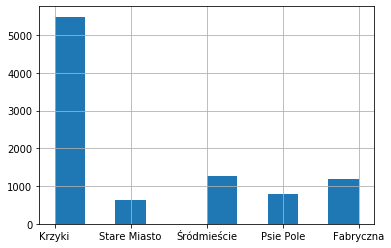

In [27]:
df.district.hist()

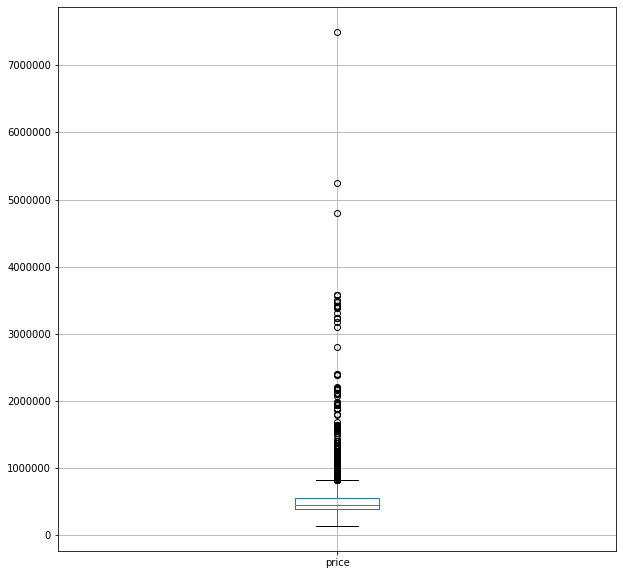

In [36]:
df.boxplot(column='price',figsize=(10,10))